In [1]:
from pandas.plotting import autocorrelation_plot
import pandas as pd
import numpy as np
from pymongo import MongoClient
import math
from sklearn.impute import KNNImputer
from matplotlib import pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas.plotting import register_matplotlib_converters

In [2]:
client = MongoClient()
db = client['climate-database']
collection= db['precipitation']
collection

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'climate-database'), 'precipitation')

In [55]:
df = pd.DataFrame(collection.find({'stateansi':17,'countyansi':1},{'_id':0,'GDD':0,'KDD':0,'yield':0}))
df=df.sort_values(by=['year', 'week'])

no_of_states = len(df['stateansi'].unique())
no_of_counties = len(df['countyansi'].unique())
no_of_year = len(df['year'].unique())
print("States:", no_of_states, "Counties:", no_of_counties, "Years:", no_of_year)

df

States: 1 Counties: 1 Years: 39


,year,week,stateansi,countyansi,PRCP,TMAX,TMIN,TAVG
874,1981,1,17.0,1.0,0.000000,0.066667,-8.150000,-4.041667
875,1981,2,17.0,1.0,6.914286,-4.019048,-13.790476,-8.904762
876,1981,3,17.0,1.0,0.000000,1.433333,-10.428571,-4.497619
877,1981,4,17.0,1.0,1.257143,9.042857,-1.800000,3.621429
878,1981,5,17.0,1.0,7.542857,4.233333,-6.942857,-1.354762
...,...,...,...,...,...,...,...,...
101,2019,48,17.0,1.0,35.000000,9.500000,0.935714,4.500000
102,2019,49,17.0,1.0,1.095238,8.014286,-2.057143,3.057143
103,2019,50,17.0,1.0,3.142857,5.250000,-4.914286,0.200000
104,2019,51,17.0,1.0,3.642857,2.557143,-5.835714,-1.228571


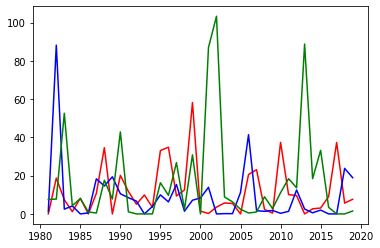

In [4]:
#week wise visualization

plt.plot(df[df.week==3].year.unique(), df[df.week==3].PRCP, color='red')
plt.plot(df[df.week==4].year.unique(), df[df.week==4].PRCP, color='blue')
plt.plot(df[df.week==5].year.unique(), df[df.week==5].PRCP, color='green')

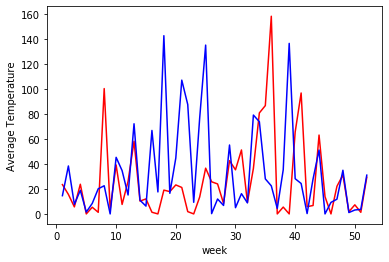

In [5]:
#year wise visualization

plt.xlabel('week')
plt.ylabel('Average Temperature')
plt.plot(df[df['year']==2018].week, df[df['year']==2018].PRCP, color="red")
plt.plot(df[df['year']==2019].week, df[df['year']==2019].PRCP, color="blue")

In [6]:
df.isna().sum()

year          0
week          0
stateansi     0
countyansi    0
PRCP          0
TMAX          0
TMIN          0
TAVG          0
dtype: int64

In [7]:
# df.PRCP.replace(0, np.nan, inplace=True)
# df[df.PRCP.isnull()]

In [8]:
# np.array(df['PRCP']).reshape(-1,1)

# imputer = KNNImputer(n_neighbors=2)
# df['PRCP'] = imputer.fit_transform(np.array(df['PRCP']).reshape(-1,1))
# df.PRCP

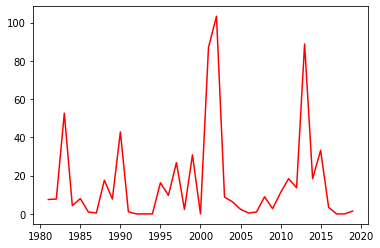

In [9]:
plt.plot(df[df.week==5].year.sort_values(), df[df.week==5].PRCP, color='red')

In [10]:
df[df.week==3].PRCP.count()

39

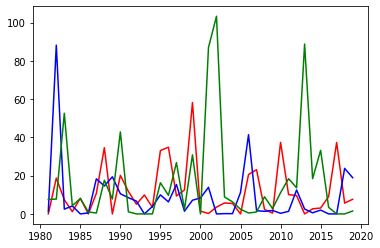

In [11]:
plt.plot(df[df.week==3].year.unique(), df[df.week==3].PRCP, color='red')
plt.plot(df[df.week==4].year.unique(), df[df.week==4].PRCP, color='blue')
plt.plot(df[df.week==5].year.unique(), df[df.week==5].PRCP, color='green')

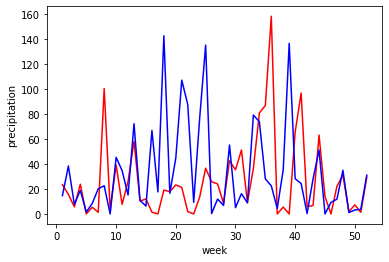

In [12]:
plt.xlabel('week')
plt.ylabel('precipitation')
# plt.plot(df[df['year']==2017].week, df[df['year']==2017].PRCP, color="green")
plt.plot(df[df['year']==2018].week, df[df['year']==2018].PRCP, color="red")
plt.plot(df[df['year']==2019].week, df[df['year']==2019].PRCP, color="blue")

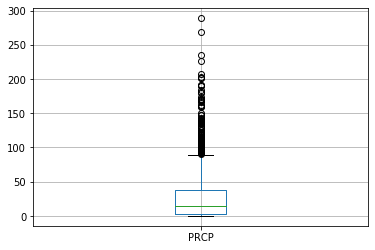

In [13]:
# n_df = df[[]]
df.boxplot(column='PRCP')

In [14]:
df['year-week'] = df['year'].astype(str) + '-' + df['week'].astype(str)
df['period'] = pd.to_datetime(df['year'].astype(str) + '-' + df['week'].astype(str)+ '0', format='%Y-%W%w')
df

,year,week,stateansi,countyansi,PRCP,TMAX,TMIN,TAVG,year-week,period
874,1981,1,17.0,1.0,0.000000,0.066667,-8.150000,-4.041667,1981-1,1981-01-11
875,1981,2,17.0,1.0,6.914286,-4.019048,-13.790476,-8.904762,1981-2,1981-01-18
876,1981,3,17.0,1.0,0.000000,1.433333,-10.428571,-4.497619,1981-3,1981-01-25
877,1981,4,17.0,1.0,1.257143,9.042857,-1.800000,3.621429,1981-4,1981-02-01
878,1981,5,17.0,1.0,7.542857,4.233333,-6.942857,-1.354762,1981-5,1981-02-08
...,...,...,...,...,...,...,...,...,...,...
101,2019,48,17.0,1.0,35.000000,9.500000,0.935714,4.500000,2019-48,2019-12-08
102,2019,49,17.0,1.0,1.095238,8.014286,-2.057143,3.057143,2019-49,2019-12-15
103,2019,50,17.0,1.0,3.142857,5.250000,-4.914286,0.200000,2019-50,2019-12-22
104,2019,51,17.0,1.0,3.642857,2.557143,-5.835714,-1.228571,2019-51,2019-12-29


In [15]:
df['PRCP']. corr(df['TAVG'])

0.21933969781682106

In [16]:
sdf=df.drop(columns=['TAVG', 'TMAX', 'TMIN','stateansi','countyansi', 'year','week','year-week'])

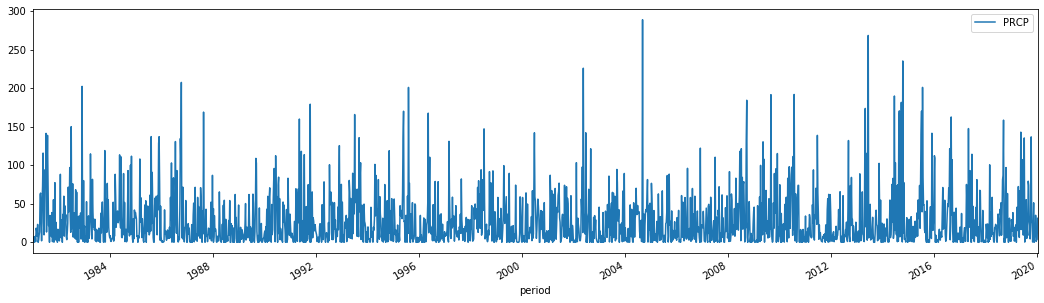

In [17]:
sdf.plot(x='period', y='PRCP',figsize=(18,5))

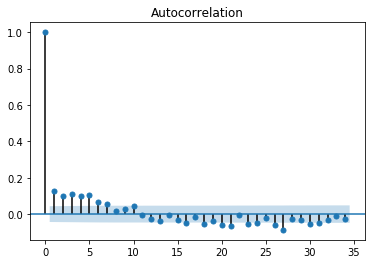

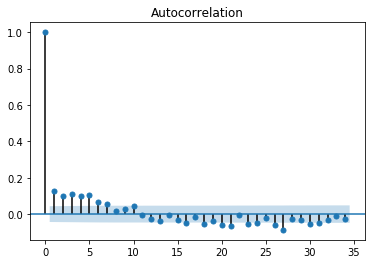

In [18]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sdf['PRCP'])

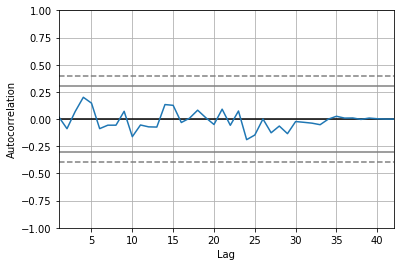

In [19]:
autocorrelation_plot(sdf['PRCP'][2000:])

In [20]:
sdf = sdf[['period','PRCP']] 
sdf

,period,PRCP
874,1981-01-11,0.000000
875,1981-01-18,6.914286
876,1981-01-25,0.000000
877,1981-02-01,1.257143
878,1981-02-08,7.542857
...,...,...
101,2019-12-08,35.000000
102,2019-12-15,1.095238
103,2019-12-22,3.142857
104,2019-12-29,3.642857


In [21]:
# sdf.plot()

### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

test_result=adfuller(df['PRCP'])
test_result

(-15.595205671591593,
 1.8586151943987493e-28,
 4,
 2037,
 {'1%': -3.433564315018763,
  '5%': -2.862959925476948,
  '10%': -2.5675259052472796},
 19897.637564074368)

In [22]:
def adfuller_test(prcp):
    result=adfuller(prcp)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
result = adfuller_test(df['PRCP'])
result

ADF Test Statistic : -15.595205671591593
p-value : 1.8586151943987493e-28
#Lags Used : 4
Number of Observations Used : 2037
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [23]:
# X = sdf.PRCP
# X.size
# train = X[0:30]
# test = X[30:]
# X = sdf[]

# sdf[0:30]

In [24]:
m = ARIMA(df['PRCP'], (2,0,0)) #p,d,q

C:\Users\eisha\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [25]:
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                   PRCP   No. Observations:                 2042
Model:                     ARMA(2, 0)   Log Likelihood              -10095.234
Method:                       css-mle   S.D. of innovations             33.949
Date:                Wed, 07 Oct 2020   AIC                          20198.468
Time:                        15:24:32   BIC                          20220.955
Sample:                             0   HQIC                         20206.716
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         27.1082      0.943     28.742      0.000      25.260      28.957
ar.L1.PRCP     0.1183      0.022      5.364      0.000       0.075       0.161
ar.L2.PRCP     0.0853      0.022      3.871      0.000       0.042       0.129
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            2.7997           +0.0000j            2.7997            0.0000
AR.2           -4.1856           +0.0000j            4.1856            0.5000
-----------------------------------------------------------------------------
"""

In [26]:
# m.geterrors()
predictions = m.predict(df['PRCP'])

In [27]:
predictions.size

2042

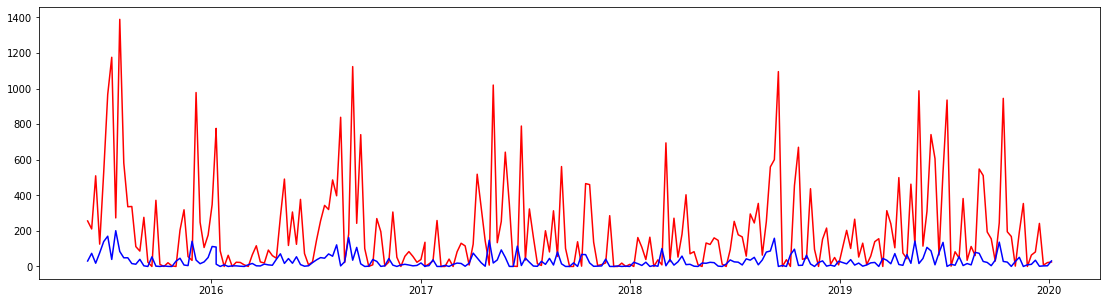

In [28]:
plt.figure(figsize=(19,5))
plt.plot(sdf['period'][1800:], predictions[1800:], color='red')
plt.plot(sdf['period'][1800:], sdf['PRCP'][1800:], color='blue')

In [29]:
math.sqrt(mean_squared_error(sdf['PRCP'], predictions))

284.972334362793

In [30]:
from pmdarima.arima import auto_arima
Arima_model=auto_arima(sdf['PRCP'][0:2000], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=12, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=20)
Arima_model.summary()

C:\Users\eisha\AppData\Roaming\Python\Python37\site-packages\pmdarima\arima\_validation.py:60: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=20907.954, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=20374.739, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19815.466, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=20905.954, Time=0.03 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=19813.467, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=inf, Time=0.65 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=20372.739, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=inf, Time=1.56 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 9.280 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2000
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -9904.733
Date:                Wed, 07 Oct 2020   AIC                          19813.467
Time:                        15:24:48   BIC                          19824.668
Sample:                             0   HQIC                         19817.580
                               - 2000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9022      0.009   -105.059      0.000      -0.919      -0.885
sigma2      1177.2730     18.850     62.454      0.000    1140.327    1214.219
===================================================================================
Ljung-Box (Q):                      105.19   Jarque-Bera (JB):              4860.46
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.26   Skew:                             2.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
# predictions=Arima_model.fit()

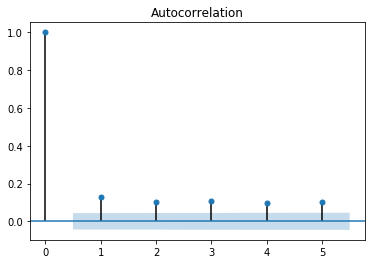

In [32]:
# pip install pmdarima
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
acf_plot = plot_acf(sdf['PRCP'],lags=5)

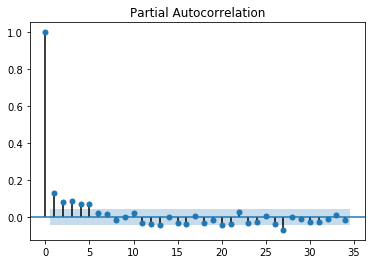

In [33]:
pacf_plot = plot_pacf(sdf['PRCP'])

In [36]:
X = sdf['period']
y = sdf['PRCP']

In [37]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

params = {'n_estimators': 500,
          'max_depth': 3,
#           'min_samples_split': 5,
          'learning_rate': 0.05,
          'loss': 'ls'}

reg = ensemble.GradientBoostingRegressor(**params)

reg.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

C:\Users\eisha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GradientBoostingRegressor(learning_rate=0.05, n_estimators=500)

In [39]:
pred = reg.predict(np.array(X_test).reshape(-1,1))
y_orig = np.array(y_test).reshape(-1,1)
mse = mean_squared_error(y_orig, pred)
print("The mean squared error (MSE) on test set: {:.4f}".format(math.sqrt(mse)))
pred.size

The mean squared error (MSE) on test set: 37.5967


511

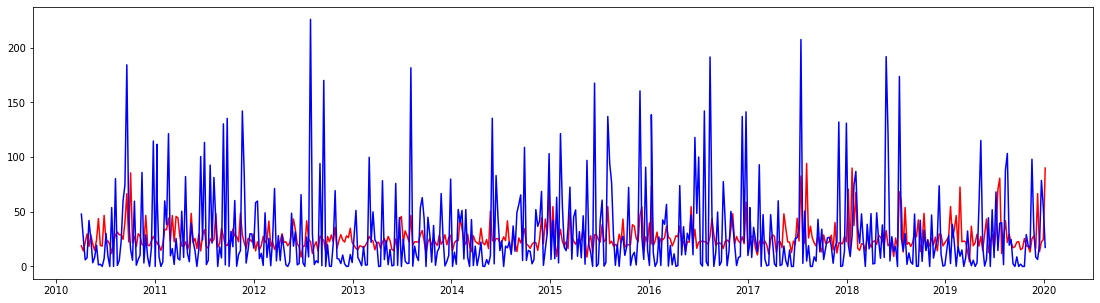

In [40]:
plt.figure(figsize=(19,5))
plt.plot(sdf['period'][len(sdf.period)-len(y_test):], pred, color='red')
plt.plot(sdf['period'][len(sdf.period)-len(y_test):], y_test, color='blue')

In [41]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(n_estimators=300)
regr.fit(np.array(X_train).reshape(-1,1), np.array(y_train).reshape(-1,1))

C:\Users\eisha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(n_estimators=300)

In [42]:
pred_reg = regr.predict(np.array(X_test).reshape(-1,1))
y_orig = np.array(y_test).reshape(-1,1)
mse = mean_squared_error(y_orig, pred_reg)
print("The mean squared error (MSE) on test set: {:.4f}".format(math.sqrt(mse)))
pred.size

The mean squared error (MSE) on test set: 39.3101


511

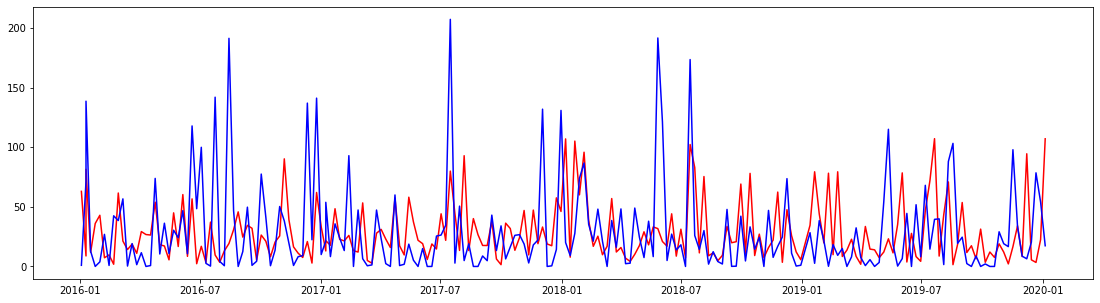

In [52]:
plt.figure(figsize=(19,5))
plt.plot(sdf['period'][len(sdf.period)-len(y_test)+300:], pred_reg[300:], color='red')
plt.plot(sdf['period'][len(sdf.period)-len(y_test)+300:], y_test[300:], color='blue')

In [53]:
test_results = pd.DataFrame()
test_results['period'] = X_test 
test_results['y_original'] = y_test
test_results['GradientBoostingReg'] = pred
test_results['RandomForestReg'] = pred_reg
test_results

,period,y_original,GradientBoostingReg,RandomForestReg
1327,1989-08-27,47.828571,18.864709,23.900857
1991,2018-03-25,26.142857,14.226887,14.625476
1469,1992-05-24,6.057143,22.153632,3.404096
839,2015-05-10,7.916667,29.668232,45.179305
1141,1986-02-16,42.000000,18.291954,7.561213
...,...,...,...,...
493,2008-09-28,6.423077,66.547699,94.562418
747,2013-08-04,20.400000,13.582760,5.550825
1698,1996-09-29,78.571429,22.533868,3.370119
1595,1994-10-09,54.047619,24.572394,22.533333
